In [1]:
#import required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') #to ignore warnings
from sqlalchemy import create_engine
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import math

### Goals:

- Rank players by market __value__ and __reputation (ir)__ -- sql


- Find out how __BMI__ (Body Mass Index) and __age__ of players affect their __speed (pac)__


- Check correlation between __ova, bov and pot__ (scores) / between __value, wage and release_clause__ (finance)


- Define __potential (pot)__ as the target and build __linear regression__ with defined after exploration values


## Data Exploration

In [2]:
#read the data
data = pd.read_csv("cleaned_data_fifa21.csv")

In [3]:
pd.set_option('display.max_columns', None)  #to view all columns of the data
data.head()

,id,name,age,nationality,club,ova,bov,pot,w/f,sm,a/w,d/w,ir,height,weight,joined,end_contract,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy,hits,bp,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,16,Luis García,37,Spain,KAS Eupen,71,70,71,4 ★,3★,Medium,Medium,1 ★,178,65,2014,2019,600000,7000,1100000,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63,4,CM,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
1,41,Iniesta,36,Spain,Vissel Kobe,81,82,81,4 ★,4★,High,Medium,4 ★,170,68,2018,2021,5500000,12000,7200000,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,58,70,85,85,63,59,149,CAM,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3
2,80,E. Belözoğlu,38,Turkey,Fenerbahçe SK,77,77,77,4 ★,4★,Medium,Medium,2 ★,170,72,2019,2020,2800000,44000,5300000,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,44,71,83,77,62,66,7,CM,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2
3,330,R. Keane,35,Republic of Ireland,LA Galaxy,80,81,80,4 ★,3★,High,Low,2 ★,175,73,2011,2022,5500000,10000,0,380,68,84,63,81,84.0,374,82,82.0,63,63,84,380,69,68,77.0,83,83.0,363,81,62.0,72,68,80,343,67,34.0,85.0,82.0,75,86.0,71,28,26,17.0,63,11,9,13,14,16,1974,407,68,82,75,82,31,69,10,CF,79+1,79+1,79+1,79+0,81+-1,81+-1,81+-1,79+0,81+-1,81+-1,81+-1,78+1,74+1,74+1,74+1,78+1,57+1,57+1,57+1,57+1,57+1,52+1,47+1,47+1,47+1,52+1,20+1
4,1179,G. Buffon,42,Italy,Juventus,82,82,82,2 ★,1★,Medium,Medium,4 ★,193,92,2019,2021,2200000,41000,3600000,95,13,15,13,37,17.0,122,26,20.0,13,35,28,251,37,30,55.0,80,49.0,243,56,71.0,34,69,13,150,38,28.0,12.0,50.0,22,70.0,35,13,11,11.0,396,77,76,74,91,78,1292,429,77,76,74,78,33,91,154,GK,31+3,31+3,31+3,30+0,33+0,33+0,33+0,30+0,34+3,34+3,34+3,32+3,35+3,35+3,35+3,32+3,28+3,33+3,33+3,33+3,28+3,26+3,29+3,29+3,29+3,26+3,80+2


In [6]:
password = getpass.getpass()

········


In [7]:
#get access to Mysql and export the data to sql
connection = 'mysql+pymysql://root:' + password + '@localhost/fifa21'
engine = create_engine(connection)
#data.to_sql('players', engine)

### Goal:  Rank players by market value and reputation

*__Outcome__: From the tables below we see, that the rankings on __Market Value__ and __Reputation__ are different.*

In [9]:
query1 = 'SELECT  name AS Player, value AS Market_Value, \
        DENSE_RANK() OVER(ORDER BY value DESC) AS Ranking \
        FROM fifa21.players LIMIT 10'
query2 = 'SELECT  name AS Player, ir AS International_Reputation, \
        DENSE_RANK() OVER(ORDER BY ir DESC) AS Ranking \
        FROM fifa21.players LIMIT 10'
value_player = pd.read_sql_query(query1, engine)
ir_player = pd.read_sql_query(query2, engine)
player_ranking = pd.concat([value_player, ir_player], axis=1)  #to merge the results in one table
player_ranking

,Player,Market_Value,Ranking,Player,International_Reputation,Ranking
0,K. Mbappé,105500000,1,L. Suárez,5 ★,1
1,Neymar Jr,90000000,2,Z. Ibrahimović,5 ★,1
2,K. De Bruyne,87000000,3,Cristiano Ronaldo,5 ★,1
3,R. Lewandowski,80000000,4,Neymar Jr,5 ★,1
4,S. Mané,78000000,5,M. Neuer,5 ★,1
5,M. Salah,78000000,5,L. Messi,5 ★,1
6,V. van Dijk,75500000,6,F. Ribéry,4 ★,2
7,J. Oblak,75000000,7,Dani Alves,4 ★,2
8,R. Sterling,72500000,8,Cesc Fàbregas,4 ★,2
9,H. Kane,71000000,9,Thiago Silva,4 ★,2


### Goal:  Find out how BMI (Body Mass Index) and age of players affect their speed.

*__Outcome__: While, almost no relation of __BMI and pace__ was found, __age__ showed visible impact on the speed of player.* 

In [10]:
#define the formula
def bmi_formula(x,y):
    bmi = []
    for i in range(len(data)):
        z = int(round(y[i] / (x[i] / 100)**2, 1))
        bmi.append(z)
    return pd.DataFrame(bmi, columns=['bmi'])  #make it a dataframe
#apply the formula
players_bmi = bmi_formula(data['height'], data['weight'])
players_bmi = pd.concat([data[['name', 'age', 'pac']], players_bmi], axis = 1)  #add other columns from the data
players_bmi.rename(columns = {'name' : 'player', 'age' : 'age', 'pac' : 'pace'}, inplace = True)  #rename them
#players_bmi.to_sql('bmi', engine)  #exported to sql
players_bmi.head()

,player,age,pace,bmi
0,Luis García,37,53,20
1,Iniesta,36,58,23
2,E. Belözoğlu,38,44,24
3,R. Keane,35,68,23
4,G. Buffon,42,77,24


Text(0, 0.5, 'Pace')

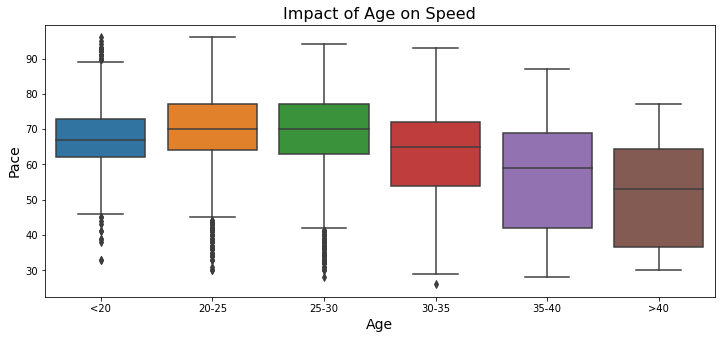

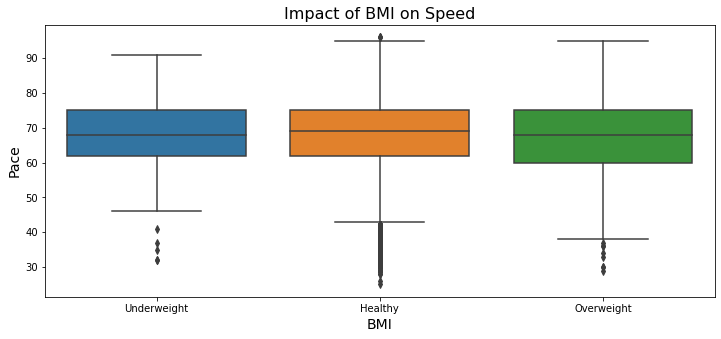

In [11]:
#now plot the boxcox for both
fig, ax = plt.subplots(figsize=(12,5))
#cut to groups and name them
age_groups = pd.cut(players_bmi['age'], bins = [15, 20, 25, 30, 35, 40, 50], labels = ['<20', '20-25', '25-30', '30-35', '35-40', '>40'])
bmi_groups = pd.cut(players_bmi['bmi'], bins = [17, 19, 25, 34], labels = ['Underweight', 'Healthy', 'Overweight'])
y = 'pace'
ax = sns.boxplot(age_groups, y, data = players_bmi)
ax.axes.set_title('Impact of Age on Speed', fontsize = 16)
ax.set_xlabel('Age', fontsize = 14)
ax.set_ylabel('Pace', fontsize = 14)
#plt.savefig('age_pace.png')  #image saved

fig, ax = plt.subplots(figsize = (12,5))
ax = sns.boxplot(bmi_groups, y, data = players_bmi)
ax.axes.set_title('Impact of BMI on Speed', fontsize = 16)
ax.set_xlabel('BMI', fontsize = 14)
ax.set_ylabel('Pace', fontsize = 14)
#plt.savefig('bmi_pace.png')

### Goal:  Check correlation between ova, bov and pot / between value, wage and release clause.

*__Outcome__: Overall score __(ova)__ and best overall __(bov)__ are almost identical __(corr 0.99)__. However, potential __(pot)__ is different and not really dependent on the other two. That is why I decided to define potential as __the target__ (see next __goal__), find out what really affects potential score and be able to predict the target.*

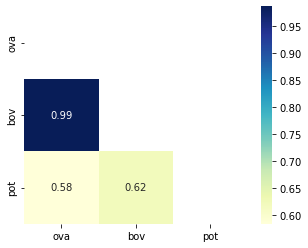

In [12]:
#gather scores in one data
scores = data[['ova', 'bov', 'pot']]
#define the correlation and build matrix
corr_score = scores.corr()
fig, ax = plt.subplots(figsize=(5, 4))
mask = np.zeros_like(corr_score)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr_score, mask = mask, annot=True, cmap="YlGnBu")
plt.show()

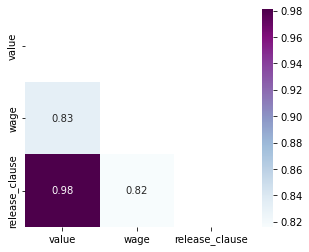

In [13]:
#gather finances in one data
money = data[['value', 'wage', 'release_clause']]
corr_money = money.corr()
#define the correlation and build matrix
fig, ax = plt.subplots(figsize=(5, 4))
mask = np.zeros_like(corr_money)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr_money, mask = mask, annot=True, cmap="BuPu")
plt.show()

### Goal:  Define potential as the target and build linear regression with defined after exploration values

*__Outcome__: After normalization of columns, that had correlation with the target, two columns were droped because of the appeared __multicollinearity__. Filtered independent values reached __r2 score of 0.58__ in the regression (58% prediction of potential). Train and testing set is considered linear in model __visualization__.*

In [14]:
#first I need to encode the categorical column, that is needed for prediction
#encode with LabelEncoder
label_encoder = LabelEncoder().fit(data['ir'])
data['ir'] = label_encoder.transform(data['ir'])

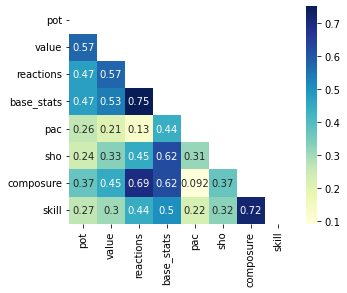

In [15]:
#after the correlations were checked, I separated the columns, that had more correlation with the target
corr_pot = data[['pot', 'value', 'reactions', 'base_stats', 'pac', 'sho', 'composure', 'skill']]
#show correlation matrix
corr_pot = corr_pot.corr()
fig, ax = plt.subplots(figsize=(5, 4))
mask = np.zeros_like(corr_pot)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr_pot, mask = mask, annot=True, cmap="YlGnBu")
plt.show()

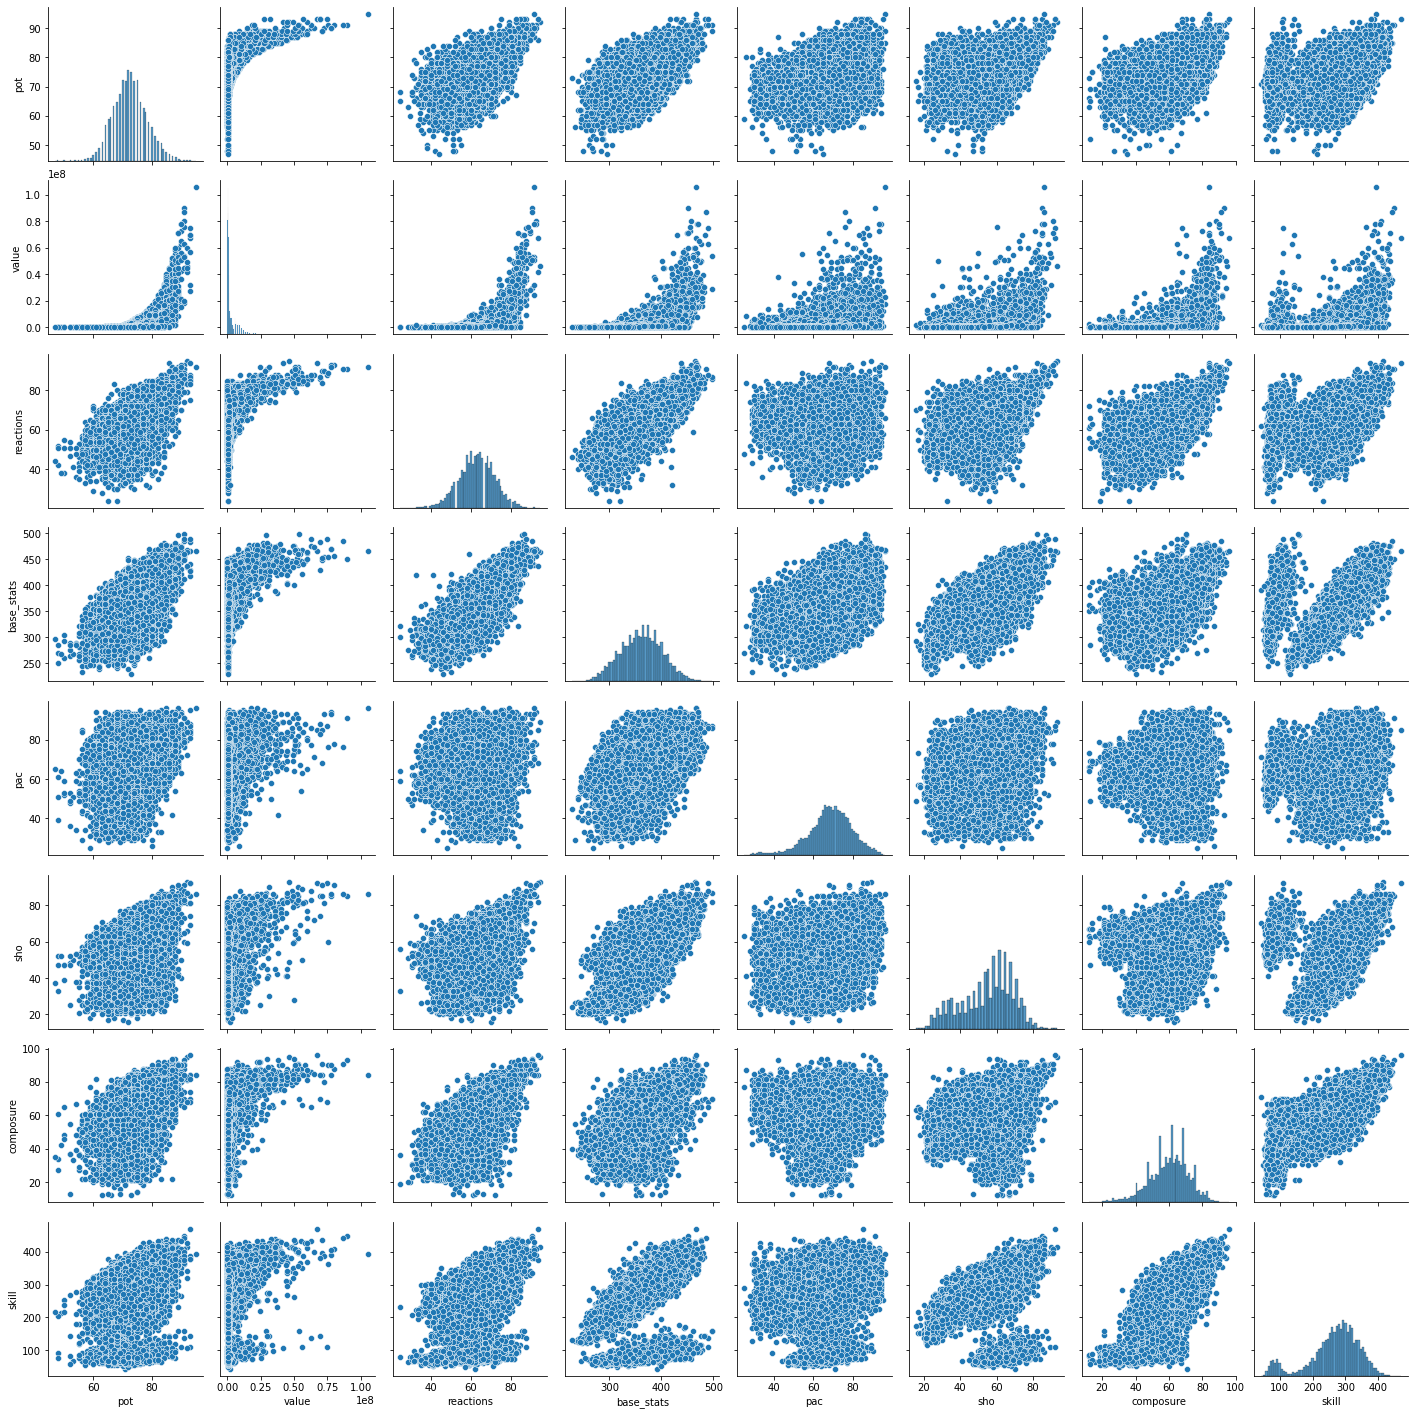

In [16]:
#plot the pairplot to see which one need to be transformed
sns.pairplot(data[['pot', 'value', 'reactions', 'base_stats', 'pac', 'sho', 'composure', 'skill']])

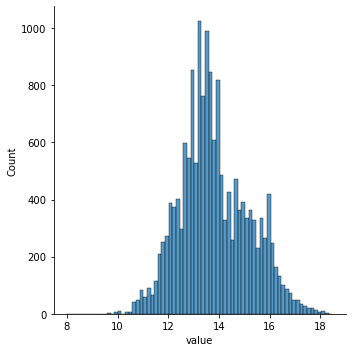

In [17]:
#apply logarithmic transformation on value column
data['value'] = np.log(data['value'])
sns.displot(data['value'])

In [185]:
#apply boxcox on pac and sho columns
fitted_pac, fitted_lambda = stats.boxcox(data['pac'])
fitted_sho, fitted_lambda = stats.boxcox(data['sho'])
data['pac'] = list(fitted_pac)
data['sho'] = list(fitted_sho)

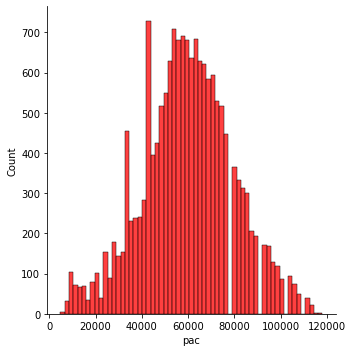

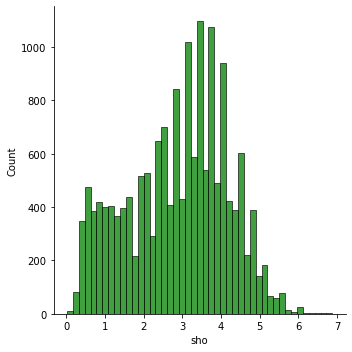

In [209]:
#show the result
sns.displot(data['pac'], color ="red")
sns.displot(data['sho'], color ="green")

In [18]:
#infinite values were found..remove them
data['value'].replace([np.inf, -np.inf], np.nan, inplace=True)  #to see how many are they, with replacing with NaN
data['value'].isna().sum()  #319 values
data['value'] = data['value'].replace(np.nan, data['value'].quantile(0.5))  #replace with 50%

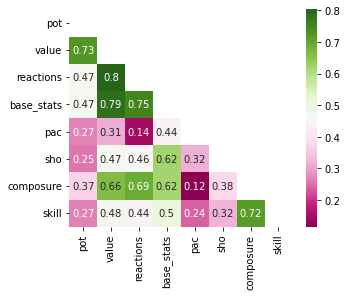

In [207]:
#check correlation after transformation
check_corr = data[['pot', 'value', 'reactions', 'base_stats', 'pac', 'sho', 'composure', 'skill']]
#show correlation matrix
check_corr = check_corr.corr()
fig, ax = plt.subplots(figsize=(5, 4))
mask = np.zeros_like(check_corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(check_corr, mask = mask, annot=True, cmap="PiYG")
plt.show()

*Because __multicollinearity__ was found between __value, base_stats and reactions__ columns, I decided not to use base_stats and reactions in regression.*

### Linear regression 

In [188]:
#define dependent and independent values
y = data['pot']
X = data[['value', 'pac', 'sho', 'composure', 'skill']]

In [203]:
#train-test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 100)
#apply train-test model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_test_predict = lm.predict(X_test)
#find the optimal score for r2_score
r2 = r2_score(y_test, y_test_predict)
print(f'R2 score = {round(r2, 2)}')

R2 score = 0.58


In [200]:
#find errors score and adjusted r2
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = math.sqrt(mse)
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print(f"""Mean squared error = {round(mse, 2)}
Mean absolute error = {round(mae, 2)}
Adjusted R2 score = {round(adj_r2, 2)}""")

Mean squared error = 14.17
Mean absolute error = 3.05
Adjusted R2 score = 0.58


### Visualization 

In [201]:
#define residuals
y_train_predict = lm.predict(X_train)
residual_test = y_test-y_test_predict
residual_train = y_train-y_train_predict

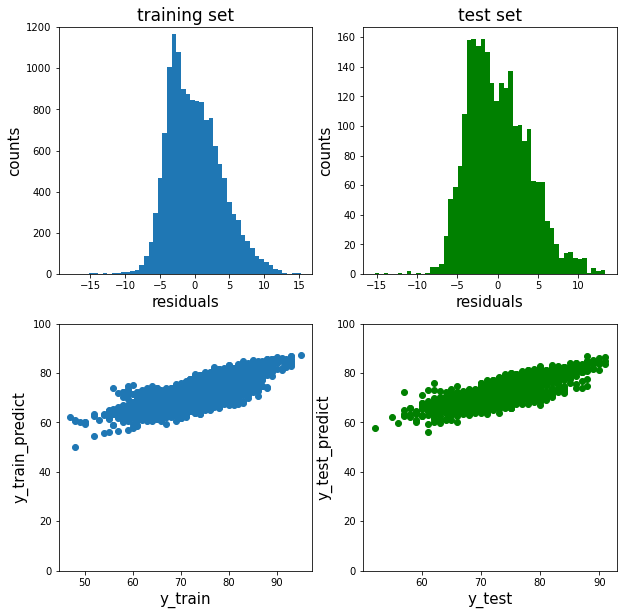

In [208]:
#visualize in test and training set
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax[0,0].set_title('training set', fontsize = 17)
ax[0,1].set_title('test set', fontsize = 17)

ax[0,0].set_xlabel('residuals', fontsize = 15)
ax[0,0].set_ylabel('counts', fontsize = 15)
ax[0,1].set_xlabel('residuals', fontsize = 15)
ax[0,1].set_ylabel('counts', fontsize = 15)
ax[1,0].set_xlabel('y_train', fontsize = 15)
ax[1,0].set_ylabel('y_train_predict', fontsize = 15)
ax[1,1].set_xlabel('y_test', fontsize = 15)
ax[1,1].set_ylabel('y_test_predict', fontsize = 15)

ax[0,0].hist(residual_train, bins = 50)
ax[0,1].hist(residual_test, bins = 50, color = 'green')

ax[1,0].scatter(x = y_train, y = y_train_predict)
ax[1,1].scatter(x = y_test, y = y_test_predict, color = 'green')
ax[0,0].set_ylim(0, 1200)
ax[1,0].set_ylim(0, 100)
ax[1,1].set_ylim(0, 100)
#plt.savefig('train_test_plot.png')  #save the plot